# K-Nearest Neighbors (KNN) and Principal Component Analysis (PCA) Notebook

This notebook will guide you through two important machine learning techniques: **K-Nearest Neighbors (KNN)** and **Principal Component Analysis (PCA)**.

- **KNN** is a simple yet powerful classification algorithm that predicts the class of a data point based on the classes of its nearest neighbors in the feature space.
- **PCA** is a dimensionality reduction technique that helps to simplify datasets by transforming them into a smaller set of uncorrelated variables while preserving as much variability as possible.

# K-Nearest Neighbors(KNN)


In the first part of this notebook, we will focus on $KNN-Algorithm$. KNN is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.
<br>

<img src="knn/example 1.png"  height="30%" width="30%">


## Imports

In [ ]:
import numpy as np
from tqdm import tqdm_notebook

## How it works?

We have some labeled data set $X-train$, and a new set $X$ that we want to classify based on previous classyfications



### Seps

#### 1. Calculate distance to all neightbours
#### 2. Sort neightbours (based on closest distance)
#### 3. Count possibilities of each class for k nearest neighbours
#### 4. The class with highest possibilty is Your prediction

## 1. Calculate distance to all neighbours

Depending on the problem You should use diffrent type of count distance method.
<br>
For example we can use Euclidean distance. Euclidean distance is the "ordinary" straight-line distance between two points in D-Dimensional space

#### Definiton
$d(p, q) = d(q, p) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + \dots + (q_D - p_D)^2} = \sum_{d=1}^{D} (p_d - q_d)^2$

#### Example
Distance in $R^2$
<img src="knn/euklidean_example.png"  height="30%" width="30%">


$p = (4,6)$
<br>
$q = (1,2)$
<br>
$d(p, q) = \sqrt{(1-4)^2 + (2-6)^2} =\sqrt{9 + 16} = \sqrt{25} = 5 $



### Code

In [ ]:
def get_euclidean_distance(A_matrix, B_matrix):
    """
    Function computes euclidean distance between matrix A and B
    Args:
        A_matrix (numpy.ndarray): Matrix size N1:D
        B_matrix (numpy.ndarray): Matrix size N2:D

    Returns:
        numpy.ndarray: Matrix size N1:N2
    """

    A_square = np.reshape(np.sum(A_matrix * A_matrix, axis=1), (A_matrix.shape[0], 1))
    B_square = np.reshape(np.sum(B_matrix * B_matrix, axis=1), (1, B_matrix.shape[0]))
    AB = A_matrix @ B_matrix.T

    C = -2 * AB + B_square + A_square

    return np.sqrt(C)

### Example Usage

In [ ]:
X = np.array([[1,2,3] , [-4,5,-6]])

X_train = np.array([[0,0,0], [1,2,3], [4,5,6], [-4, 4, -6]])

print("X: {} Exaples in {} Dimensional space".format(*X.shape))
print("X_train: {} Exaples in {} Dimensional space".format(*X_train.shape))


print()

print("X:")
print(X)

print()

print("X_train")
print(X_train)


X: 2 Exaples in 3 Dimensional space
X_train: 4 Exaples in 3 Dimensional space

X:
[[ 1  2  3]
 [-4  5 -6]]

X_train
[[ 0  0  0]
 [ 1  2  3]
 [ 4  5  6]
 [-4  4 -6]]


In [ ]:
distance_matrix = get_euclidean_distance(X, X_train)

print("Distance Matrix shape: {}".format(distance_matrix.shape))
print("Distance between first example from X and first form X_train {}".format(distance_matrix[0,0]))
print("Distance between first example from X and second form X_train {}".format(distance_matrix[0,1]))


Distance Matrix shape: (2, 4)
Distance between first example from X and first form X_train 3.7416573867739413
Distance between first example from X and second form X_train 0.0


## 2. Sort neightbours

In order to find best fitting class for our observations we need to find to which classes belong observation neightbours and then to sort classes based on the closest distance


### Code

In [ ]:
def get_sorted_train_labels(distance_matrix, y):
    """
    Function sorts y labels, based on probabilities from distances matrix
    Args:
        distance_matrix (numpy.ndarray): Distance Matrix, between points from X and X_train, size: N1:N2
        y (numpy.ndarray): vector of classes of X points, size: N1

    Returns:
        numpy.ndarray: labels matrix sorted according to distances to nearest neightours, size N1:N2

    """
    order = distance_matrix.argsort(kind='mergesort')

    return np.squeeze(y[order])


### Example Usage

In [ ]:
y_train = np.array([[1, 1, 2, 3]]).T
print("Labels array {} Examples in {} Dimensional Space".format(*y_train.shape))

print("Distance matrix shape {}".format(distance_matrix.shape))

sorted_train_labels = get_sorted_train_labels(distance_matrix, y_train)

print("Sorted train labels {} shape".format(sorted_train_labels.shape))
print("Closest 3 classes for first element from set X: {}".format(sorted_train_labels[0, :3]))

Labels array 4 Examples in 1 Dimensional Space
Distance matrix shape (2, 4)
Sorted train labels (2, 4) shape
Closest 3 classes for first element from set X: [1 1 2]


## 3. Count possibilities of each class for k nearest neighbours

In order to find best class for our observation $x$ we need to calculate the probability of belonging to each class. In our case it is quite easy. We need just to count how many from k-nearest-neighbours of observation $x$ belong to each class and then devide it by k
<br><br>
$p(y=class \space| x)  = \frac{\sum_{1}^{k}(1 \space if \space N_i = class, \space else \space 0) }{k}$ Where $N_i$ is $i$ nearest neightbour



### Code

In [ ]:
def get_p_y_x_using_knn(y, k):
    """
    The function determines the probability distribution p (y | x)
    for each of the labels for objects from the X
    using the KNN classification learned on the X_train

    Args:
        y (numpy.ndarray): Sorted matrix of N2 nearest neighbours labels, size N1:N2
        k (int): number of nearest neighbours for KNN algorithm

    Returns: numpy.ndarray: Matrix of probabilities for N1 points (from set X) of belonging to each class,
    size N1:C (where C is number of classes)
    """

    first_k_neighbors = y[:, :k]

    N1, N2 = y.shape
    classes = np.unique(y)
    number_of_classes = classes.shape[0]

    probabilities_matrix = np.zeros(shape=(N1, number_of_classes))

    for i, row in enumerate(first_k_neighbors):
        for j, value in enumerate(classes):
            probabilities_matrix[i][j] = list(row).count(value) / k

    return probabilities_matrix


### Example usage

In [ ]:
print("Sorted train labels:")
print(sorted_train_labels)

probabilities_matrix = get_p_y_x_using_knn(y=sorted_train_labels, k=4)



print("Probability fisrt element belongs to 1-st class: {:2f}".format(probabilities_matrix[0,0]))
print("Probability fisrt element belongs to 3-rd class: {:2f}".format(probabilities_matrix[0,2]))



Sorted train labels:
[[1 1 2 3]
 [3 1 1 2]]
Probability fisrt element belongs to 1-st class: 0.500000
Probability fisrt element belongs to 3-rd class: 0.250000


## 4. The class with highest possibilty is Your prediction

At the end we combine all previous steps to get prediction

### Code

In [ ]:
def predict(X, X_train, y_train, k, distance_function):
    """
    Function returns predictions for new set X based on labels of points from X_train
    Args:
        X (numpy.ndarray): set of observations (points) that we want to label
        X_train (numpy.ndarray): set of lalabeld bservations (points)
        y_train (numpy.ndarray): labels for X_train
        k (int): number of nearest neighbours for KNN algorithm

    Returns:
        (numpy.ndarray): label predictions for points from set X
    """
    distance_matrix = distance_function(X, X_train)

    sorted_labels = get_sorted_train_labels(distance_matrix=distance_matrix, y=y_train)

    p_y_x = get_p_y_x_using_knn(y=sorted_labels, k=k)

    number_of_classes = p_y_x.shape[1]
    reversed_rows = np.fliplr(p_y_x)

    prediction = number_of_classes - (np.argmax(reversed_rows, axis=1) + 1)

    return prediction

### Example usage

In [ ]:
prediction = predict(X, X_train, y_train, 3, get_euclidean_distance)

print("Predicted propabilities of classes for for first observation", probabilities_matrix[0])
print("Predicted class for for first observation", prediction[0])

print()

print("Predicted propabilities of classes for for second observation", probabilities_matrix[1])
print("Predicted class for for second observation", prediction[1])

Predicted propabilities of classes for for first observation [0.5  0.25 0.25]
Predicted class for for first observation 0

Predicted propabilities of classes for for second observation [0.5  0.25 0.25]
Predicted class for for second observation 0


## Accuracy

To find how good our knn model works we should count accuracy

### Code

In [ ]:
def count_accuracy(prediction, y_true):
    """
    Returns:
        float: Predictions accuracy

    """
    N1 = prediction.shape[0]

    accuracy = np.sum(prediction == y_true) / N1

    return accuracy

### Example usage

In [ ]:
y_true = np.array([[0, 2]])

predicton = predict(X, X_train, y_train, 3, get_euclidean_distance)


print("True classes:{}, accuracy {}%".format(y_true, count_accuracy(predicton, y_true)  * 100))

True classes:[[0 2]], accuracy 50.0%


## Find best k

Best k parameter is that one for which we have highest accuracy

### Code

In [ ]:
def select_knn_model(X_validation, y_validation, X_train, y_train, k_values, distance_function):
    """
    Function returns k parameter that best fit Xval points
    Args:
        Xval (numpy.ndarray): set of Validation Data, size N1:D
        Xtrain (numpy.ndarray): set of Training Data, size N2:D
        yval (numpy.ndarray): set of labels for Validation data, size N1:1
        ytrain (numpy.ndarray): set of labels for Training Data, size N2:1
        k_values (list): list of int values of k parameter that should be checked

    Returns:
        int: k paprameter that best fit validation set
    """

    accuracies = []

    for k in tqdm_notebook(k_values):
        prediction = predict(X_validation, X_train, y_train, k, distance_function)

        accuracy = count_accuracy(prediction, y_validation)
        accuracies.append(accuracy)

    best_k = k_values[accuracies.index(max(accuracies))]

    return best_k, accuracies


## Real World Example - Iris Dataset


<img src="knn/iris_example1.jpeg"  height="60%" width="60%">


This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Each example contains 4 attributes
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

Predicted attribute: class of iris plant.

<img src="knn/iris_example2.png"  height="70%" width="70%">






In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

iris_X = iris.data
iris_y = iris.target

print("Iris: {} examples in {} dimensional space".format(*iris_X.shape))
print("First example in dataset :\n Speal lenght: {}cm \n Speal width: {}cm \n Petal length: {}cm \n Petal width: {}cm".format(*iris_X[0]))

print("Avalible classes", np.unique(iris_y))

Iris: 150 examples in 4 dimensional space
First example in dataset :
 Speal lenght: 5.1cm 
 Speal width: 3.5cm 
 Petal length: 1.4cm 
 Petal width: 0.2cm
Avalible classes [0 1 2]


### Prepare Data

In our data set we have 150 examples (50 examples of each class), we have to divide it into 3 datasets.
1. Training data set, 90 examples. It will be used to find  k - nearest neightbours
2. Validation data set, 30 examples. It will be used to find best k parameter, the one for which accuracy is highest
3. Test data set, 30 examples. It will be used to check how good our model performs

Data has to be shuffled (mixed in random order), because originally it is stored 50 examples of class 0, 50 of 1 and 50 of 2.


In [ ]:
from sklearn.utils import shuffle

iris_X, iris_y = shuffle(iris_X, iris_y, random_state=134)


test_size = 30
validation_size = 30
training_size = 90

X_test = iris_X[:test_size]
X_validation = iris_X[test_size: (test_size+validation_size)]
X_train = iris_X[(test_size+validation_size):]

y_test = iris_y[:test_size]
y_validation = iris_y[test_size: (test_size+validation_size)]
y_train = iris_y[(test_size+validation_size):]

### Find best k parameter

<ipython-input-13-8de028d3b491>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(k_values):


  0%|          | 0/47 [00:00<?, ?it/s]

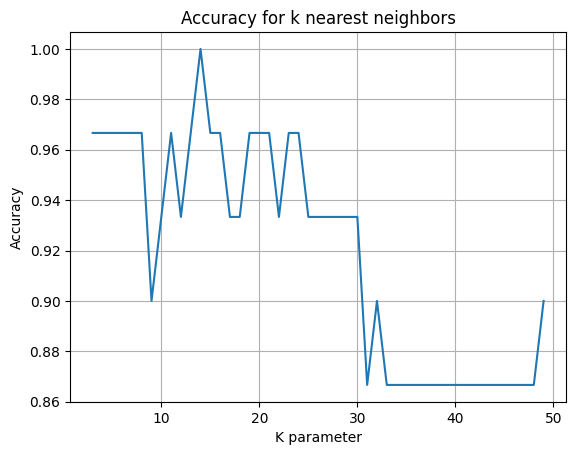

In [ ]:
k_values = [i for i in range(3,50)]

best_k, accuracies = select_knn_model(X_validation, y_validation, X_train, y_train, k_values, distance_function=get_euclidean_distance)

plt.plot(k_values, accuracies)
plt.xlabel('K parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy for k nearest neighbors')
plt.grid()
plt.show()


### Count accuracy for training set

In [ ]:
prediction = predict(X_test, X_train, y_train, best_k, get_euclidean_distance)

accuracy = count_accuracy(prediction, y_test)

print("Accuracy for best k={}: {:2f}%".format(best_k, accuracy*100))


Accuracy for best k=14: 93.333333%


### Compare with Library Implementation of KNN

Now let's train and test a `KNeighborsClassifier` from `sklearn` using the same best value of `k`. compare its accuracy to our custom KNN implementation and justify it if the results are different from yours.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train the library KNN model with the same best_k
knn_lib = KNeighborsClassifier(n_neighbors=best_k)
knn_lib.fit(X_train, y_train)

# Predict on the test set
y_pred_lib = knn_lib.predict(X_test)

# Calculate and compare accuracy
accuracy_lib = accuracy_score(y_test, y_pred_lib)
print("Accuracy (Library KNN, k={}): {:.2f}%".format(best_k, accuracy_lib * 100))


Accuracy (Library KNN, k=14): 93.33%


## Real World Example - Mnist Dataset

Mnist is a popular database of handwritten images created for people who are new to machine learning. There are many courses on the internet that include classification problem using MNIST dataset.

This dataset contains 55000 images and labels. Each image is 28x28 pixels large, but for the purpose of the classification task they are flattened to 784x1 arrays $(28 \cdot 28 = 784)$. Summing up our training set is a matrix of size $[50000, 784]$  = [amount of images, size of image]. We will split it into 40000 training examples and 10000 validation examples to choose a best k


It also contains 5000 test images and labels, but for test we will use only 1000 (due to time limitations, using 5k would take 5x as much time)


<h3>Mnist Data Example</h3>
<img src="knn/mnist_example.jpg" height="70%" width="70%">

Now we are going to download this dataset and split it into test and train sets.

In [ ]:
import cv2
import numpy as np
from sklearn.datasets import fetch_openml

training_size = 49_000
validation_size = 1000
test_size = 1000

mnist = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X, y = mnist

y = y.astype(int)

X = X.astype('float32') / 255.0

X_train_full, X_test_full = X[:60000], X[60000:]
y_train_full, y_test_full = y[:60000], y[60000:]



train_images = X_train_full[:training_size]
train_labels = y_train_full[:training_size]

validation_images = X_train_full[training_size : training_size + validation_size]
validation_labels = y_train_full[training_size : training_size + validation_size]

test_images = X_test_full[:test_size]
test_labels = y_test_full[:test_size]


print("Training images matrix size: {}".format(train_images.shape))
print("Training labels matrix size: {}".format(train_labels.shape))

print("Validation images matrix size: {}".format(validation_images.shape))
print("Validation labels matrix size: {}".format(validation_labels.shape))

print("Testing images matrix size: {}".format(test_images.shape))
print("Testing labels matrix size: {}".format(test_labels.shape))

print("Possible labels {}".format(np.unique(test_labels)))

Training images matrix size: (49000, 784)
Training labels matrix size: (49000,)
Validation images matrix size: (1000, 784)
Validation labels matrix size: (1000,)
Testing images matrix size: (1000, 784)
Testing labels matrix size: (1000,)
Possible labels [0 1 2 3 4 5 6 7 8 9]


### Visualisation
Visualisation isn't necessery to the problem, but it helps to understand what are we doing.

In [ ]:
from matplotlib.gridspec import GridSpec

def show_first_8(images):
    ax =[]

    fig = plt.figure(figsize=(10, 10))

    gs = GridSpec(2, 4, wspace=0.0, hspace=-0.5)
    for i in range(2):
        for j in range(4):
            ax.append(fig.add_subplot(gs[i,j]))
    for i, axis in enumerate(ax):
        axis.imshow(images[i])

    plt.show()


First 8 images of train set:


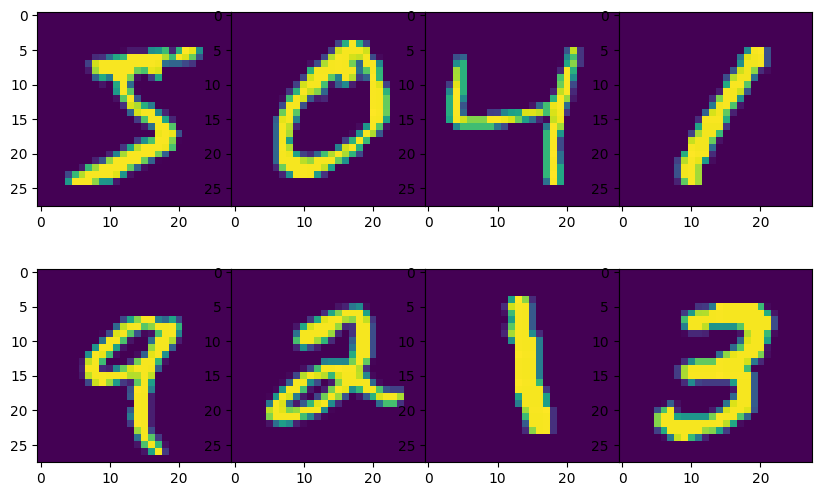

In [ ]:
first_8_images = train_images[:8]
resized = np.reshape(first_8_images, (-1,28,28))
print('First 8 images of train set:')
show_first_8(resized)


### Find best k parameter

<ipython-input-13-8de028d3b491>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(k_values):


  0%|          | 0/10 [00:00<?, ?it/s]

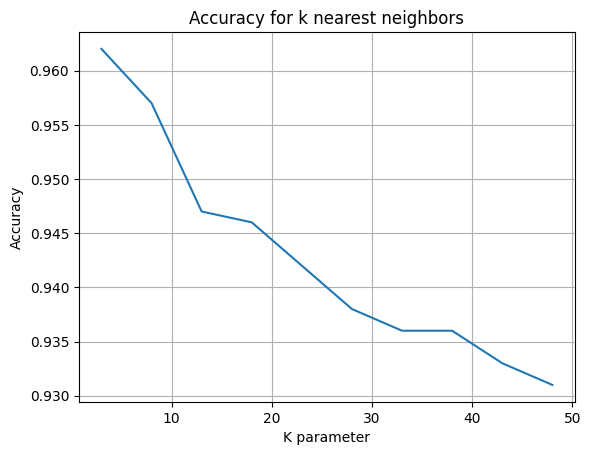

In [ ]:
k_values = [i for i in range(3, 50, 5)]

best_k, accuracies = select_knn_model(validation_images, validation_labels, train_images, train_labels, k_values,
                                      distance_function=get_euclidean_distance)

plt.plot(k_values, accuracies)
plt.xlabel('K parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy for k nearest neighbors')
plt.grid()
plt.show()



In [ ]:
prediction = np.squeeze(predict(test_images, train_images, train_labels, best_k, get_euclidean_distance))

accuracy = count_accuracy(prediction, test_labels)

print("Accuracy on test set for best k={}: {:2}%".format(best_k, accuracy * 100))


Accuracy on test set for best k=14: 94.69999999999999%


#PCA

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

## Overview
In this part, you will perform PCA credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA .

## Data Preprocessing
Read the dataset.CSV file and display a few samples.

In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [ ]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

Display dataset information.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA?
<br>
Answer:The dataset includes a variety of columns related to customer spending and credit card usage patterns. The column CUST_ID is likely the most irrelevant for PCA because it represents a unique identifier for each customer, not a measurable feature of their behavior or financial profile. This column does not carry any meaningful information for analyzing or segmenting customers and should be removed before performing PCA


In [ ]:
# Exclude the 'CUST_ID' column as it is irrelevant for PCA
data = data.drop(columns=['CUST_ID'], errors='ignore')

# Display the updated dataframe to confirm the removal of the 'CUST_ID' column
print(data.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

how do you handle missing data, and why did you choose this method?
<br>
Answer:To handle missing data, I used median imputation, which replaces missing values with the median of each column. This method was chosen because the median is less sensitive to outliers than the mean, making it a robust choice for datasets where extreme values might skew results. By filling in missing values with the median, we preserve the data's central tendency without allowing outliers to disproportionately affect the imputation, which is especially important for PCA tasks.


In [ ]:
# Fill missing values with the median of each column
data = data.fillna(data.median())

# Verify if missing values are handled
print("After filling missing values:\n", data.isnull().sum())

After filling missing values:
 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


plot the correlation matrix and identify redundant features.remove them from the dataframe.

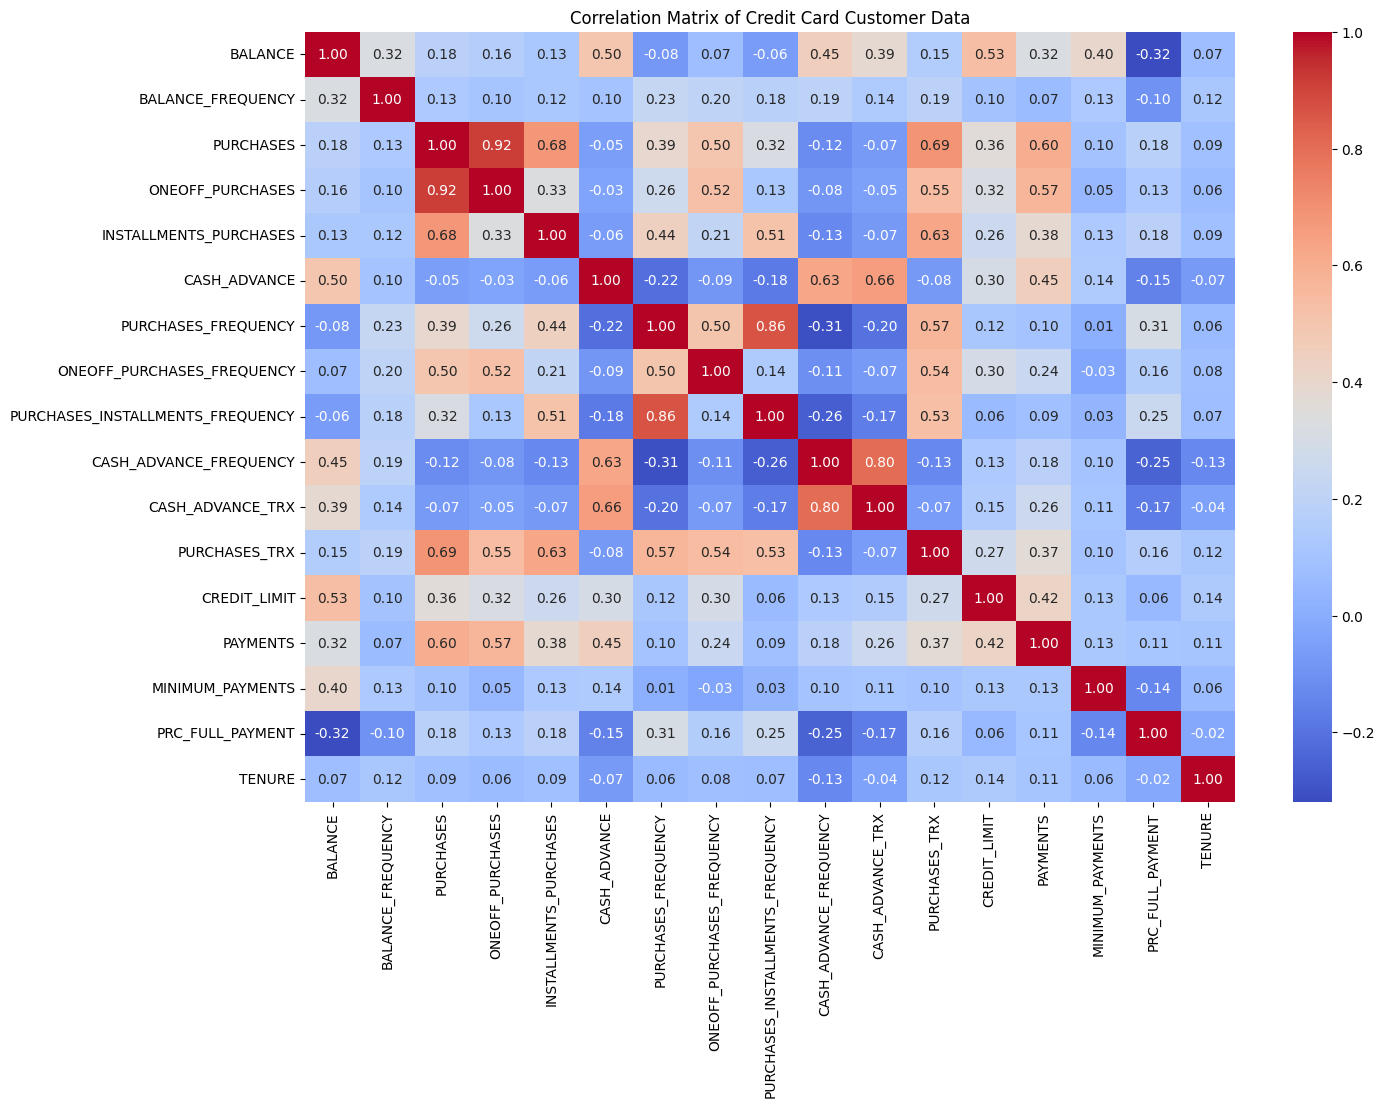

In [ ]:

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Credit Card Customer Data")
plt.show()



In [ ]:
# Identify redundant features using a correlation threshold of 0.8
threshold = 0.8
correlation_matrix = data.corr()

# Find pairs of highly correlated features based on the threshold
redundant_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            redundant_features.append(colname)

# Output redundant features
print("Redundant features:", redundant_features)

data = data.drop(columns=redundant_features)

Redundant features: ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']


## Standardize the Data
Standardize the dataset using z-score normalization

In [ ]:
# Standardize the dataset using z-score normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame for ease of use
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Display the first few rows of the standardized data
data_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.731989          -0.249434  -0.424900               -0.349079   
1  0.786961           0.134325  -0.469552               -0.454576   
2  0.447135           0.518084  -0.107668               -0.454576   
3  0.049099          -1.016953   0.232058               -0.454576   
4 -0.358775           0.518084  -0.462063               -0.454576   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0     -0.466786            -0.806490                   -0.678661   
1      2.605605            -1.221758                   -0.678661   
2     -0.466786             1.269843                    2.673451   
3     -0.368653            -1.014125                   -0.399319   
4     -0.466786            -1.014125                   -0.399319   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979         -0.302400         -0.525551  0.36068  
1  0.818642          0.097500          0.234227  0.36068  
2 -0.383805         -0.093293         -0.525551  0.36068  
3 -0.598688         -0.228307         -0.525551  0.36068  
4 -0.364368         -0.257266         -0.525551  0.36068

Why is it important to standardize the data before applying PCA?
<br>
Answer:
Standardizing the data before applying PCA is crucial because PCA is sensitive to the variance of each feature. Features with larger scales or higher variances would dominate the principal components, potentially skewing the results. By standardizing the data, we ensure that all features contribute equally to the analysis, allowing PCA to focus on the underlying structure of the data rather than the feature scales. This makes the principal components more meaningful and allows for fair comparisons across all dimensions.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:

StandardScaler: This class standardizes features by removing the mean and scaling to unit variance (z-score normalization). It transforms data so that each feature has a mean of 0 and a standard deviation of 1

Normalizer: This class scales each sample (row) individually to have unit norm (typically L2 norm).

For PCA, StandardScaler is generally the better choice because PCA is sensitive to variances across features. By standardizing, we allow PCA to analyze the relative variance structure across all features

## Principal Component Analysis (PCA)
Implement PCA from scratch.

In [ ]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        # Center the data by subtracting the mean
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Calculate the covariance matrix of the centered data
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Calculate eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Keep only the top 'n_components' eigenvalues and eigenvectors
        if self.n_components:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues = eigenvalues[:self.n_components]

        # Store the principal components (eigenvectors) and explained variance ratio
        self.components = eigenvectors
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio = eigenvalues / total_variance

    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        # Center the data by subtracting the mean
        X_centered = X - self.mean

        # Project the data onto the principal components
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components


### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer:

To explain 75% of the variance, 6 components are needed. This is visualized by plotting the cumulative explained variance, where the curve reaches or surpasses the 75% threshold at the sixth component.

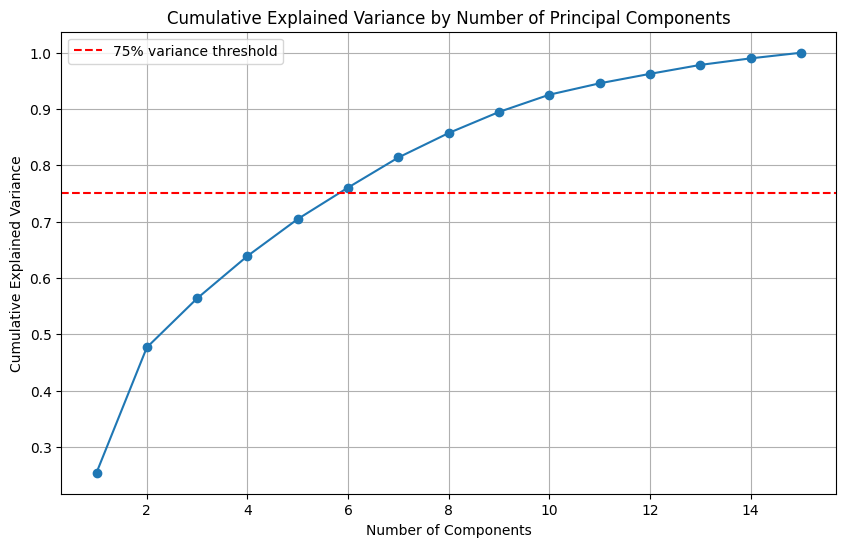

Number of components needed to explain 75% of the variance: 6
Cumulative explained variance percentages:
 [25.4, 47.7, 56.4, 63.9, 70.5, 76.1, 81.4, 85.7, 89.5, 92.6, 94.6, 96.3, 97.8, 99.0, 100.0]


In [ ]:


# Instantiate the CustomPCA class, fit it to the standardized data, and get explained variance ratio
pca = CustomPCA()
pca.fit(data_scaled)
explained_variance_ratio = pca.get_explained_variance_ratio()

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.axhline(y=0.75, color='r', linestyle='--', label='75% variance threshold')
plt.legend()
plt.grid(True)
plt.show()

# Determine the number of components needed to explain 75% of the variance
n_components_75 = np.argmax(cumulative_variance >= 0.75) + 1
print(f"Number of components needed to explain 75% of the variance: {n_components_75}")

# Calculate the cumulative explained variance as percentages
cumulative_variance_percentage = np.cumsum(explained_variance_ratio) * 100
cumulative_variance_percentage = np.round(cumulative_variance_percentage, 1)  # Round to one decimal place

# Display the cumulative explained variance as a list
print("Cumulative explained variance percentages:\n", cumulative_variance_percentage.tolist())


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [ ]:
# Select the first 6 components based on the 75% variance threshold
n_components_75 = 6
pca_transformed_data = pca.transform(data_scaled)[:, :n_components_75]

# Build a new DataFrame with the selected components
pca_df = pd.DataFrame(pca_transformed_data, columns=[f"PC{i+1}" for i in range(n_components_75)])

# Save the new DataFrame to a CSV file
pca_df.to_csv('pca_output.csv', index=False)

# Display the first few rows of the new DataFrame
pca_df.head()


PC1       PC2       PC3       PC4       PC5       PC6
0  1.731242  0.824084 -0.384320 -0.451623 -0.087766  0.438057
1  0.301398 -2.533638  0.621582 -0.939313 -0.794456  0.060615
2 -1.194199  0.887568 -1.184455  1.129115 -1.152626 -1.869029
3  0.930140  0.030106 -0.111213 -1.309452 -0.505452 -0.834667
4  1.499511  0.517780 -0.794300 -0.125376 -0.253049  0.326998

We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

Correlation matrix of the principal components:
               PC1           PC2           PC3           PC4           PC5  \
PC1  1.000000e+00 -2.251519e-16  1.294231e-16  2.881387e-16 -2.740237e-16   
PC2 -2.251519e-16  1.000000e+00  4.532074e-17  3.846281e-17  1.014194e-16   
PC3  1.294231e-16  4.532074e-17  1.000000e+00  6.046125e-17 -2.070506e-16   
PC4  2.881387e-16  3.846281e-17  6.046125e-17  1.000000e+00  4.957884e-16   
PC5 -2.740237e-16  1.014194e-16 -2.070506e-16  4.957884e-16  1.000000e+00   
PC6  3.332159e-16 -4.090892e-17 -4.018013e-16 -6.400279e-16 -6.413677e-16   

              PC6  
PC1  3.332159e-16  
PC2 -4.090892e-17  
PC3 -4.018013e-16  
PC4 -6.400279e-16  
PC5 -6.413677e-16  
PC6  1.000000e+00  


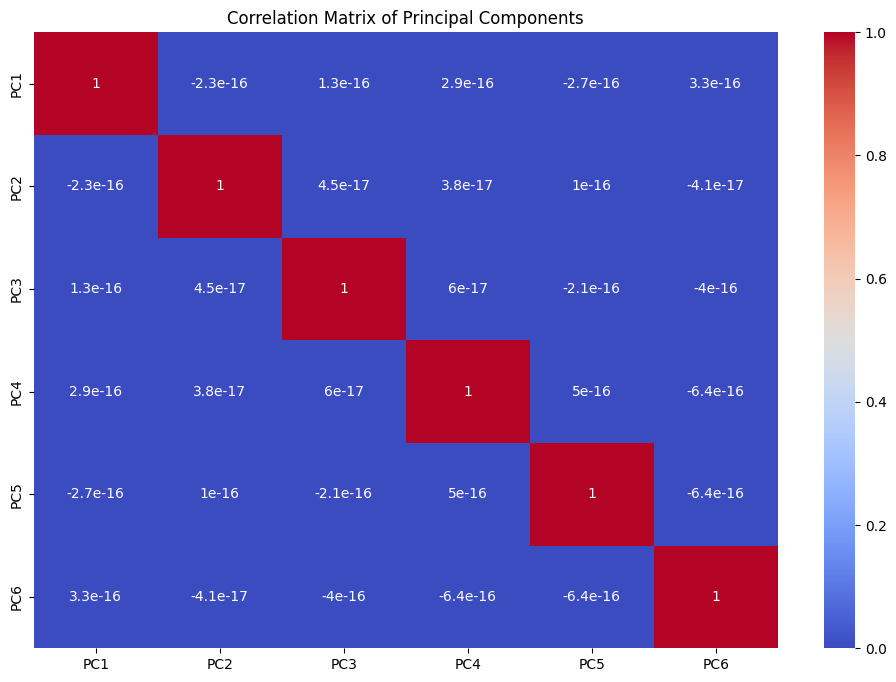

In [ ]:
# Calculate the correlation matrix for the principal components to check orthogonality
correlation_matrix_pca = pca_df.corr()

# Display the correlation matrix
print("Correlation matrix of the principal components:\n", correlation_matrix_pca)

# Visualize the correlation matrix to confirm orthogonality
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_pca, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Principal Components")
plt.show()


## t-SNE: t-distributed Stochastic Neighbor Embedding

Now let's apply t-SNE, a non-linear dimensionality reduction technique, and compare its results to PCA.



In [ ]:
# Import t-SNE from sklearn
from sklearn.manifold import TSNE

# Fit and transform the data using t-SNE (2 components)
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

### PCA (2D) vs t-SNE Comparison

We'll now compare the two methods using only 2 PCA components to match the 2D output of t-SNE.


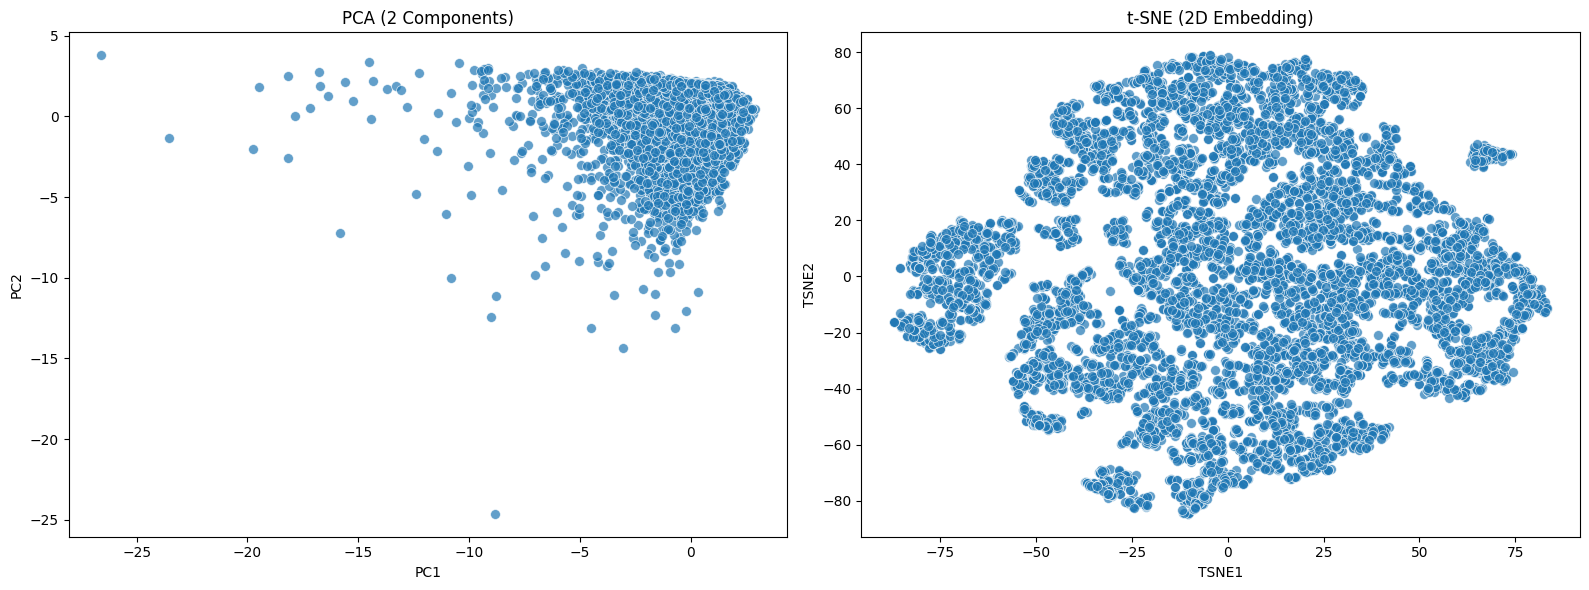

In [ ]:
# Fit PCA with only 2 components for visualization
pca_2d = CustomPCA(n_components=2)
pca_2d.fit(data_scaled)
pca_2d_transformed = pca_2d.transform(data_scaled)
pca_2d_df = pd.DataFrame(pca_2d_transformed, columns=['PC1', 'PC2'])

# Side-by-side comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA 2D Plot
sns.scatterplot(x='PC1', y='PC2', data=pca_2d_df, ax=axes[0], s=50, alpha=0.7)
axes[0].set_title("PCA (2 Components)")

# t-SNE Plot
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df, ax=axes[1], s=50, alpha=0.7)
axes[1].set_title("t-SNE (2D Embedding)")

plt.tight_layout()
plt.show()


1. What are the main conceptual differences between PCA and t-SNE in how they reduce dimensionality?

2. Which method is better for:
   - Preserving overall data variance?
   - Revealing clusters and local patterns?

3. Why might t-SNE be more effective than PCA for visualizing high-dimensional customer data?

```
YOUR ANSWER
```

Solution:

1. **Conceptual Differences**:
   - PCA is a linear method that reduces dimensionality by projecting the data onto new axes (principal components) that explain the most variance. It tries to preserve the global structure of the data.
   - t-SNE is a non-linear technique that focuses on preserving local relationships. It converts high-dimensional distances into probabilities and minimizes their divergence in a low-dimensional space, usually 2D.

2. **Which method is better for:**
   - Preserving variance → **PCA** is designed to retain the most variance in as few dimensions as possible.
   - Revealing clusters/local structure → **t-SNE** excels at separating and displaying groups that are close in high-dimensional space, even if they overlap in terms of variance.

3. **Why t-SNE might be better for visualization**:
   - t-SNE is optimized specifically for 2D (or 3D) visualization. It is better at preserving local similarity, making it easier to detect patterns and clusters that may not be visible in PCA.
   - PCA’s first two components might not capture enough structure unless a large portion of variance lies in those dimensions. This can make PCA less visually informative for complex or non-linear datasets like customer behavior.
